In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data=pd.read_csv("insurance.csv")

In [57]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
Male=pd.get_dummies(data['sex'],drop_first=True)
data=pd.concat([data,Male],axis=1)
data.head()


,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [59]:
Smoker=pd.get_dummies(data['smoker'],drop_first=True)
data=pd.concat([data,Smoker],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [60]:
data=data.rename(columns={"yes":"Smoker"})
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


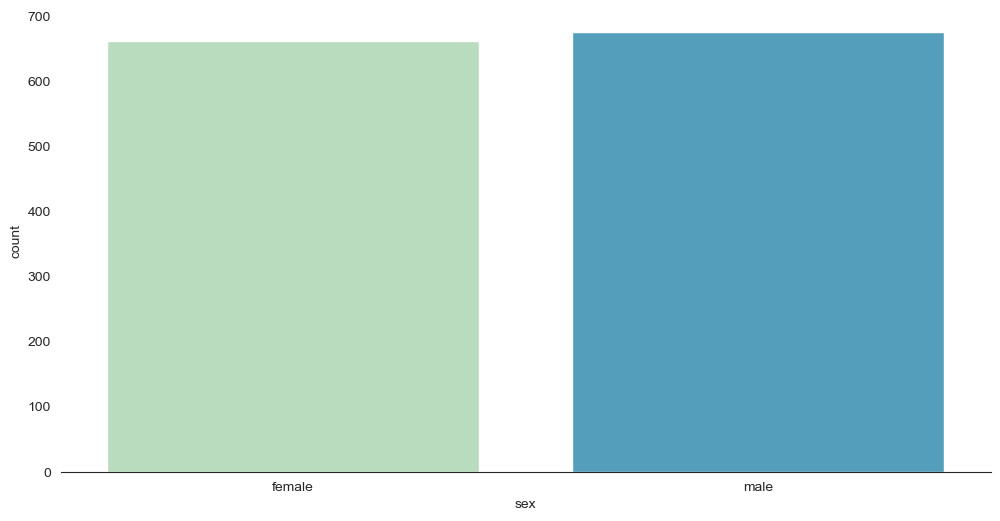

In [30]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='sex',data=data,palette="GnBu")
sns.despine(left=True)

## Checking wheather gender or smoking is corellated with charges

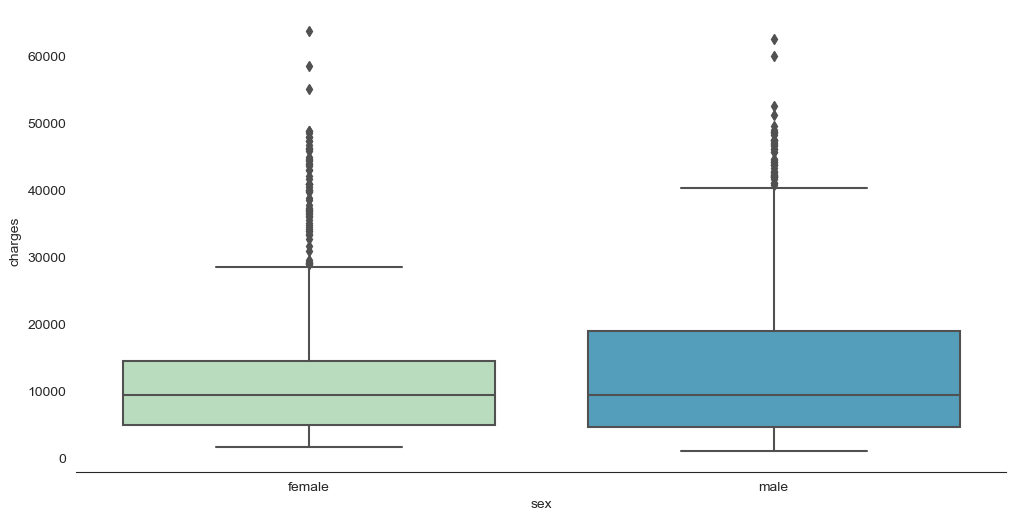

In [42]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.boxplot(x="sex",y="charges",data=data,palette="GnBu")
sns.despine(left=True)

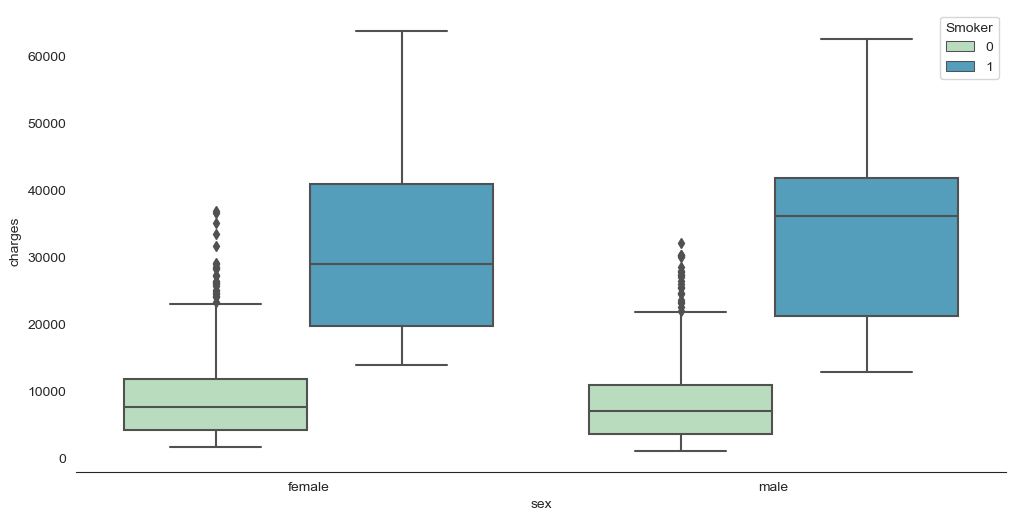

In [43]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.boxplot(x="sex",y="charges",data=data,palette="GnBu",hue="Smoker")
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

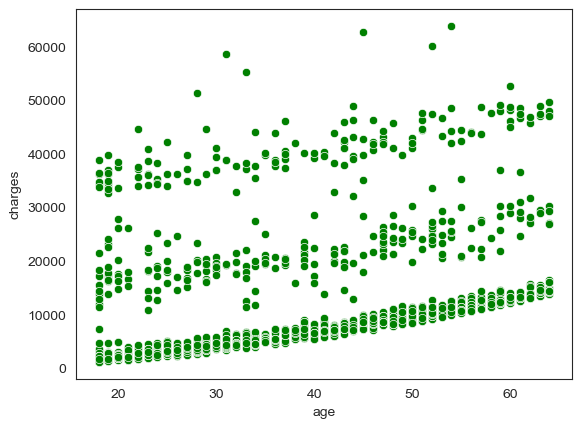

In [45]:
sns.scatterplot(x="age",y="charges",data=data,color = "green")

<Axes: xlabel='age', ylabel='charges'>

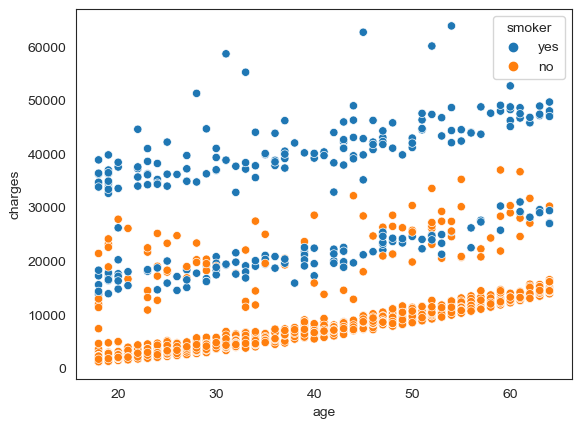

In [46]:
sns.scatterplot(x="age",y="charges",data=data,color="red",hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

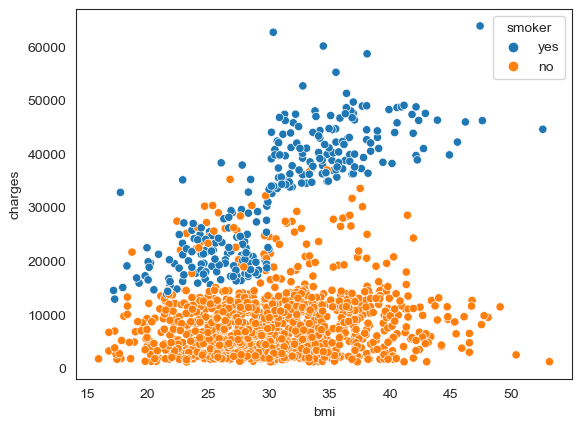

In [47]:
sns.scatterplot(x="bmi",y="charges",data=data,color="red",hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

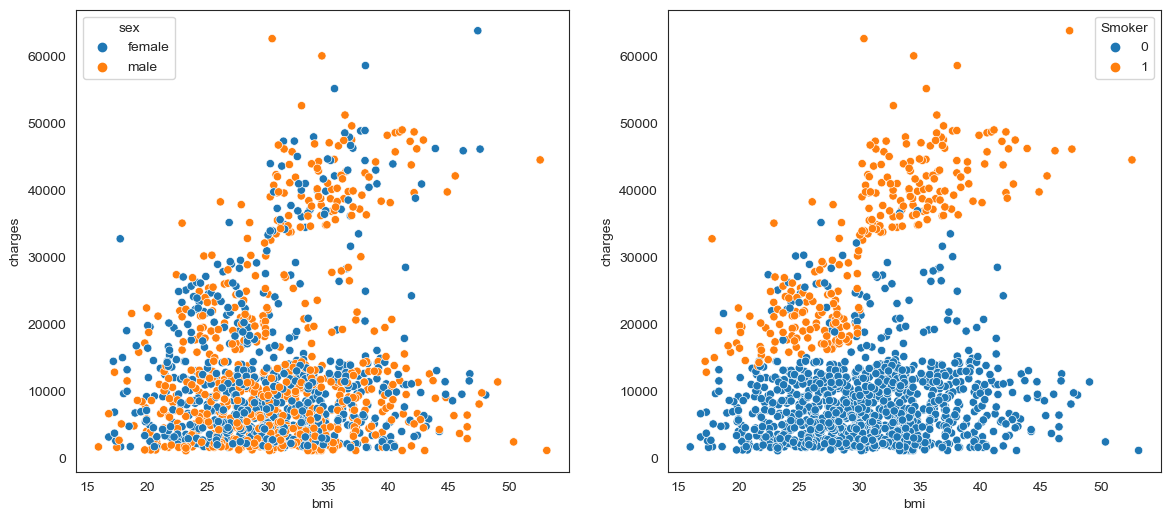

In [49]:
fig,ax = plt.subplots(nrows = 1, ncols=2, figsize = (14, 6))
sns.scatterplot(x = 'bmi', y = 'charges', data =data, hue= 'sex',ax = ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =data, hue= 'Smoker',ax =ax[1])

In [61]:
data

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [62]:
data.drop(["sex","smoker","region"],axis=1,inplace=True)

In [63]:
data

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


<Axes: >

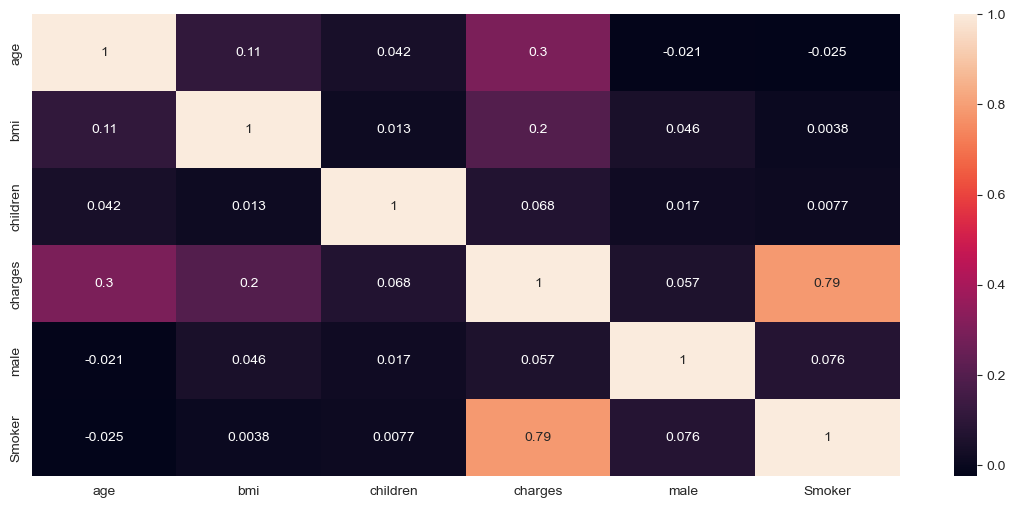

In [54]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

In [67]:
data.drop("charges",axis=1)

,age,bmi,children,male,Smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [68]:
x=data;


In [65]:
y=data["charges"]

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.4)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [86]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test  = scaler.transform(x_test)

# <font color="orange">Support Vector Regresion Modle</font>

In [87]:
from sklearn.svm import SVR
regressor =SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [88]:
predict=regressor.predict(scaled_x_test)

In [91]:
predict[:10]

array([9038.93747098, 9183.21926149, 9092.99808355, 9192.70186698,
       9098.47223406, 9054.29267324, 9054.750378  , 9212.82041587,
       9049.53251251, 9034.6072946 ])

In [92]:
y_test[:10]

453     1769.531650
336    12142.578600
800     7046.722200
577    58571.074480
686     7729.645750
792     2731.912200
4       3866.855200
641    32787.458590
427     7323.734819
692     2362.229050
Name: charges, dtype: float64